In [1]:
# Install Kaggle
!pip install kaggle


In [2]:
# Create Kaggle folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!mkdir -p ~/.kaggle


In [4]:
!cp kaggle.json ~/.kaggle/


In [5]:
!ls /content


drive  kaggle.json  sample_data


In [6]:
!mkdir -p ~/.kaggle


In [7]:
!cp /content/kaggle.json ~/.kaggle/


In [8]:
!chmod 600 ~/.kaggle/kaggle.json


In [9]:
!kaggle datasets list


ref                                                           title                                                  size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -----------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
saidaminsaidaxmadov/chocolate-sales                           Chocolate Sales                                      468320  2026-01-04 14:23:35.490000          14681        259  1.0              
aliiihussain/amazon-sales-dataset                             Amazon_Sales_Dataset                                1297759  2026-02-01 11:37:12.353000           2188         46  1.0              
syedaeman2212/deaths-and-causes                               Deaths and causes                                      3654  2026-02-03 18:40:41.400000            739         27  1.0              
vishardmehta/gold-price-f

In [10]:
# downloaded the datasets from Kaggle
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.26G/2.29G [00:19<00:00, 105MB/s] 
100% 2.29G/2.29G [00:20<00:00, 123MB/s]


In [11]:
# Successfully unzipped the files
!unzip chest-xray-pneumonia.zip


Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [12]:
!ls chest_xray


chest_xray  __MACOSX  test  train  val


In [13]:
!ls /content


chest_xray  chest-xray-pneumonia.zip  drive  kaggle.json  sample_data


In [14]:
!ls chest_xray


chest_xray  __MACOSX  test  train  val


In [15]:
!ls chest_xray/train


NORMAL	PNEUMONIA


In [16]:
# Import the required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [17]:
# Loading the Data
train_dir = '/content/chest_xray/train'
test_dir = '/content/chest_xray/test'


In [24]:
# Using Data Augementation
# Adding Image Data Generator
# Image PreProcessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [25]:
# Using Data Augementation
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [26]:
# Now I am defining the Model and creating the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
# Using MobileNetV2 CNN
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

base_model.trainable = False  # VERY IMPORTANT


/tmp/ipython-input-4152057132.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [44]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)


In [45]:
# compiling the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [42]:
# Balancing the weights
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_data.classes),
    y=train_data.classes
)

class_weights = dict(enumerate(class_weights))
print(class_weights)


{0: np.float64(1.9448173005219984), 1: np.float64(0.6730322580645162)}


In [46]:
# Training the Model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data,
    class_weight=class_weights
)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 117s 603ms/step - accuracy: 0.7631 - loss: 0.5511 - val_accuracy: 0.8413 - val_loss: 0.3516
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 79s 482ms/step - accuracy: 0.9042 - loss: 0.2276 - val_accuracy: 0.8526 - val_loss: 0.3628
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 80s 494ms/step - accuracy: 0.9120 - loss: 0.2133 - val_accuracy: 0.8413 - val_loss: 0.3636
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 79s 484ms/step - accuracy: 0.9118 - loss: 0.2074 - val_accuracy: 0.8462 - val_loss: 0.3667
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 75s 456ms/step - accuracy: 0.9117 - loss: 0.1980 - val_accuracy: 0.8574 - val_loss: 0.3474
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 78s 479ms/step - accuracy: 0.9243 - loss: 0.1751 - val_accuracy: 0.8606 - val_loss: 0.3226
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 79s 485ms/step - accuracy: 0.9240 - loss: 0.2081 - val_accuracy: 0.8718 - val_loss: 0.3263
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 77s 474ms/step - accuracy: 0.9308 - loss: 

In [48]:
# Testing the Model
import numpy as np

# Predict probabilities
y_pred_prob = model.predict(test_data)

# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# True labels
y_true = test_data.classes


20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 618ms/step


In [47]:
# Testing the accuracy of the Model
test_loss, test_accuracy = model.evaluate(test_data)
print("Test Accuracy (evaluate):", test_accuracy)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - accuracy: 0.8333 - loss: 0.4279
Test Accuracy (evaluate): 0.8717948794364929


In [49]:
# Calculation of the Performance Metrics
# Accuracy
# Precision
# Recall
# F1-Score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Accuracy  :", accuracy)
print("Precision :", precision)
print("Recall    :", recall)
print("F1-Score  :", f1)


Accuracy  : 0.8717948717948718
Precision : 0.8743961352657005
Recall    : 0.9282051282051282
F1-Score  : 0.900497512437811


[[182  52]
 [ 28 362]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       234
           1       0.87      0.93      0.90       390

    accuracy                           0.87       624
   macro avg       0.87      0.85      0.86       624
weighted avg       0.87      0.87      0.87       624



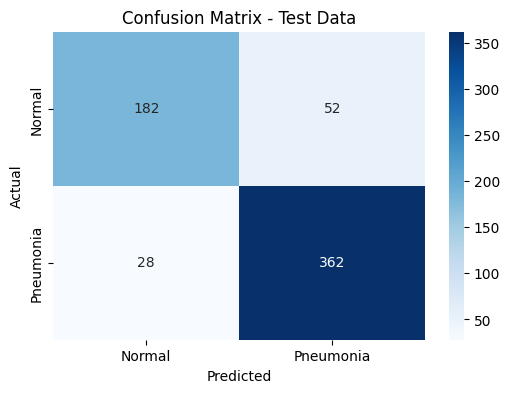

In [50]:
# Visualization of Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
y_true = test_data.classes

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal','Pneumonia'],
            yticklabels=['Normal','Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.show()


In [51]:
# Saving the Model
model.save("pneumonia_mobilenetv2_model.h5")


In [52]:
# Verifying the Class Distribution
import numpy as np

unique, counts = np.unique(train_data.classes, return_counts=True)
print(dict(zip(unique, counts)))


{np.int32(0): np.int64(1341), np.int32(1): np.int64(3875)}


In [53]:
# Confirming the Model Summary
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 75, 75,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 75, 75,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 75, 75,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 75, 75,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 75, 75,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 75, 75,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 77, 77,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 38, 38,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 38, 38,    │      2,304 │ block_1_depthwis

 Total params: 2,750,277 (10.49 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 328,196 (1.25 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


/tmp/ipython-input-686880243.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Predicted: {class_names[int(preds[i] > 0.5)]}")


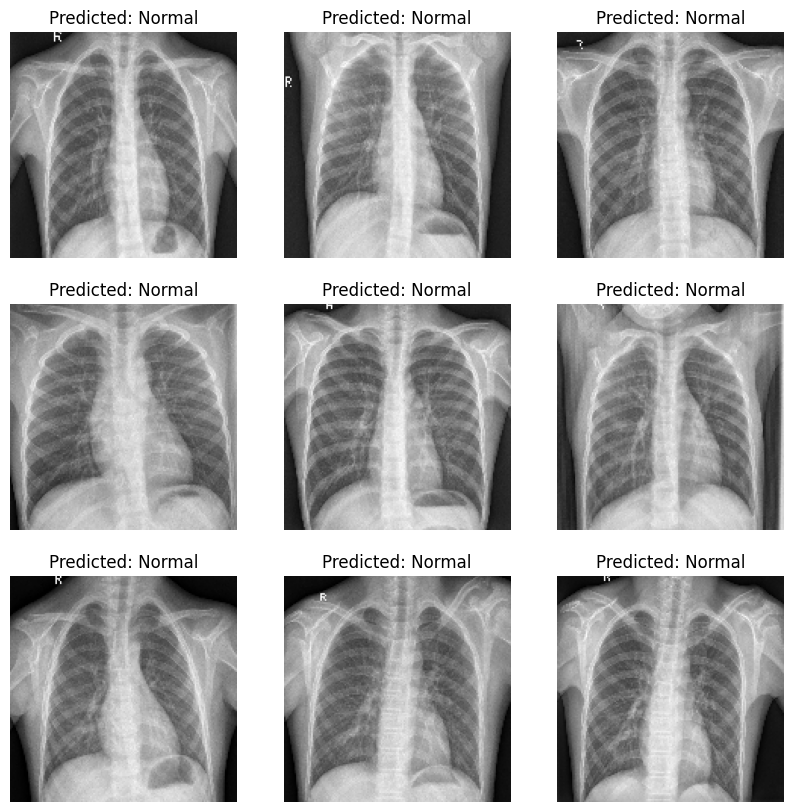

In [54]:
# Displaying the Sample Predictions
import matplotlib.pyplot as plt
import random

class_names = ['Normal', 'Pneumonia']

images, labels = next(test_data)
preds = model.predict(images)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(f"Predicted: {class_names[int(preds[i] > 0.5)]}")
    plt.axis('off')
plt.show()


## Overfitting Analysis
Training and validation accuracy curves indicate minimal overfitting,
showing good generalization of the model.


## Evaluation Metrics Interpretation
- Accuracy measures overall correctness of predictions.
- Precision indicates correctness of Pneumonia predictions.
- Recall (Sensitivity) is crucial in medical diagnosis to avoid missing Pneumonia cases.
- F1-score balances precision and recall.


In [57]:
# File Format - HDF5
model.save("pneumonia_mobilenetv2_model.h5")


In [58]:
# File Format - Keras
model.save("pneumonia_mobilenetv2_model.keras")


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


/tmp/ipython-input-262936683.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Predicted: {class_names[int(predictions[i] > 0.5)]}")


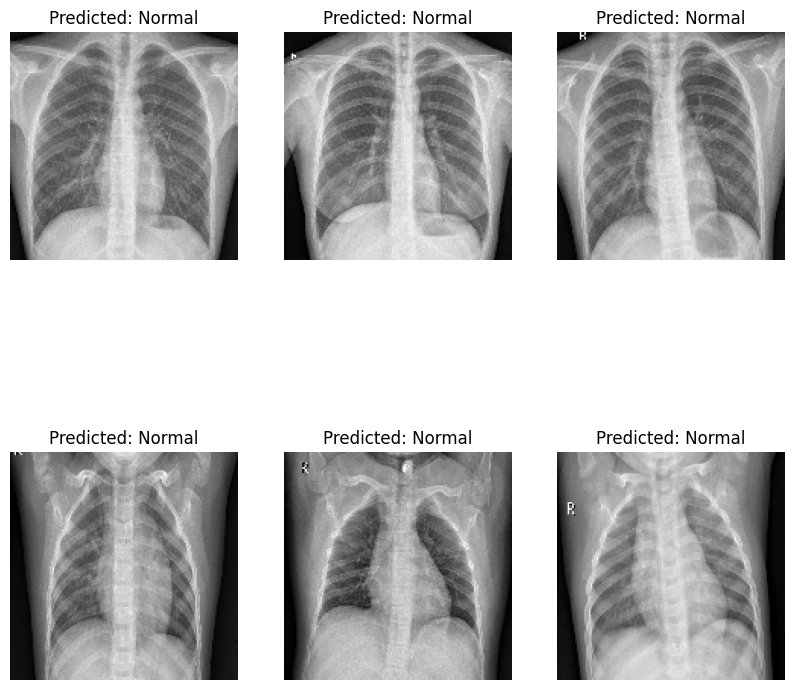

In [59]:
# Adding a Model Loading and Inference Demo
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load saved model
loaded_model = load_model("pneumonia_mobilenetv2_model.keras")

# Take one batch from test data
images, labels = next(test_data)

# Predict
predictions = loaded_model.predict(images)

class_names = ['Normal', 'Pneumonia']

plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(f"Predicted: {class_names[int(predictions[i] > 0.5)]}")
    plt.axis('off')
plt.show()
